In [1]:
library(ggplot2)

In [2]:
time_points <- c(1,10,11,11.88,12,12.13,12.88,12.96,13.88,14.29,14.88,15.29,16,16.29,16.88,17,17.04,18.04,18.17,18.29,18.88,19.04,19.21,20,20.04,20.17,21.08,21.92,22.08,22.13,23,23.04,23.13,23.71,24.13,24.75,24.96,25.17,25.83,26.17,26.33,26.83,27.17,27.21,27.96,28.21,28.96,29.17,29.25,29.79,30.21,30.25,30.83,31.08,31.25,31.75,32.21,32.29,32.79,33.25,33.29,33.79,34.17,34.33,35.04,35.25,36.04,36.17,36.38,36.79,37.17,37.38,38,38.17,39,39.13,39.38,39.88,40.33,40.92,41.17,41.38,41.92,42.17,43.17,42.38,43.42,42.75,43.92,44.25,44.42,44.92,45.04,45.42,45.79,46.17,46.46,46.71,46.96,47.67,48.46,48.79,49.83,50.04,50.79,51,51.46,51.79,52.33,53.21,55)
prop_surv <- c(1,0.993944,0.990484,0.972318,0.962802,0.950692,0.945501,0.936851,0.922145,0.9074394,0.897923,0.827854,0.821799307958478,0.816608996539792,0.81401384083045,0.805363321799308,0.785467128027682,0.778546712802768,0.773356401384083,0.771626297577855,0.744809688581315,0.737024221453287,0.730103806228374,0.688581314878893,0.681660899653979,0.664359861591695,0.655709342560554,0.646193771626298,0.636678200692042,0.624567474048443,0.617647058823529,0.607266435986159,0.609861591695502,0.588235294117647,0.579584775086505,0.576124567474048,0.559688581314879,0.557093425605536,0.540657439446367,0.529411764705882,0.519896193771626,0.515570934256055,0.511245674740484,0.491349480968858,0.474913494809689,0.464532871972318,0.459342560553633,0.455017301038062,0.453287197231834,0.440311418685121,0.42560553633218,0.419550173010381,0.410899653979239,0.396193771626298,0.389273356401384,0.377162629757785,0.353806228373702,0.345155709342561,0.326989619377163,0.318339100346021,0.312283737024221,0.308823529411765,0.295847750865052,0.292387543252595,0.27681660899654,0.269031141868512,0.256055363321799,0.237889273356401,0.227508650519031,0.220588235294118,0.205882352941176,0.200692041522491,0.189446366782007,0.191176470588235,0.182525951557093,0.146193771626298,0.136678200692042,0.116782006920415,0.114186851211073,0.109861591695502,0.102076124567474,0.0986159169550173,0.0934256055363322,0.0813148788927336,0.0717993079584775,0.0596885813148789,0.0588235294117647,0.0536332179930796,0.0467128027681661,0.0423875432525952,0.0406574394463668,0.0380622837370242,0.0311418685121107,0.0311418685121107,0.0285467128027682,0.0268166089965398,0.0259515570934256,0.0216262975778547,0.0216262975778547,0.0181660899653979,0.0173010380622837,0.0173010380622837,0.0121107266435986,0.0121107266435986,0.0121107266435986,0.0112456747404844,0.0112456747404844,0.00951557093425606,0.0069204152249135,0.0069204152249135,0)
surv_data <- cbind(time_points,prop_surv)
head(surv_data)

time_points,prop_surv
1.00,1.000000
10.00,0.993944
11.00,0.990484
11.88,0.972318
12.00,0.962802
12.13,0.950692


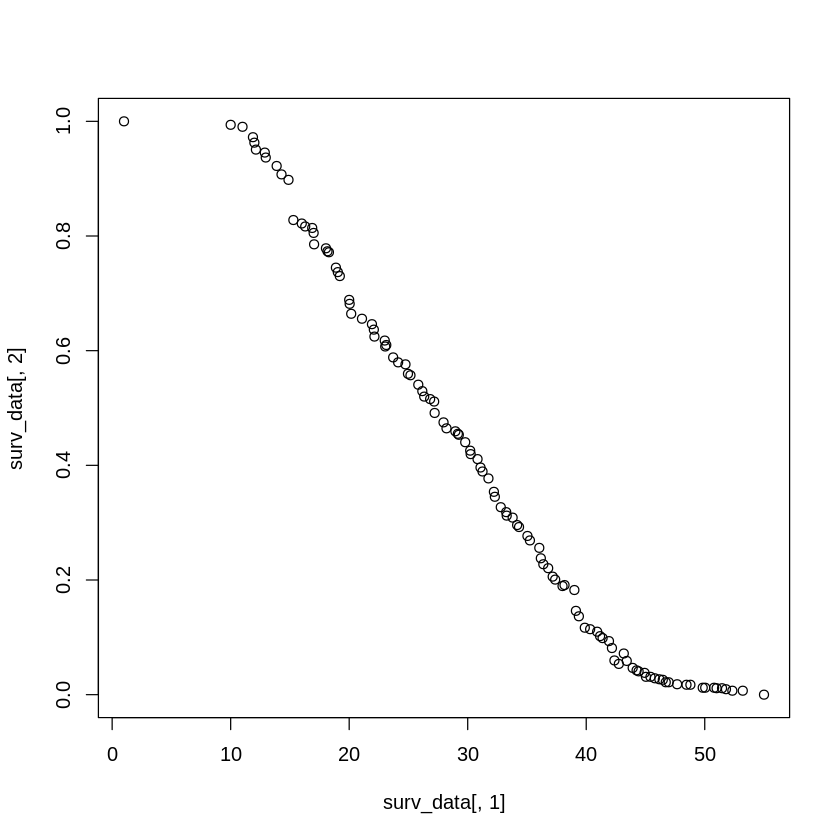

In [3]:
plot(surv_data[,1], surv_data[,2])

In [4]:
N <- 10000
a <- 0.0039
t0 <- 8
k <- 0.1911
max_s_prop <- 0.7
age_max <- 70
age_step <- 1

In [8]:
## setting up the initial table for number of non-Smurfs, proportion and number of Smurfs
#pop <- matrix(,nrow=4,ncol=age_max)
#rownames(pop)<-c("age","Smurf_prop","n_NS","n_S")
#pop[1,]<- seq(0,age_max-1,age_step)
## for fitting data
pop <- matrix(,nrow=4,ncol=length(surv_data[,1]))
rownames(pop)<-c("age","Smurf_prop","n_NS","n_S")
pop[1,]<- surv_data[,1]

In [12]:
cbind.na <- function(x, y){
    n <- max(length(x), length(y))
    length(x) <- n                      
    length(y) <- n
    combined<-cbind(x,y)
    combined[which(is.na(combined))]<-0
    return(combined)
}

Smurf <- function(age){
    age_func <- a*age*exp(-t0/age)
    smurf_prop <- ifelse(age_func>0, ifelse(age_func<max_s_prop,runif(1,0,age_func*2),runif(1,0,max_s_prop)),0)
    return(smurf_prop)
    }

pop[3,1]<-N
for(i in pop[1,]){
    pop[2,i]<-Smurf(i)
}
pop[4,1]<-round(pop[3,1]*pop[2,1], 0)
i=0
for(j in 2:length(pop[2,])){
   i=i+1 
   pop[4,j]<-round(pop[3,i]*pop[2,j] ,0)
   pop[3,j]<-pop[3,i]-pop[4,j] 
}
pop<-pop[,-length(pop[1,])]
pop

kill_Smurfs <- function(n_S){
    dyingSmurfs <- NA
    dyingSmurfs[1]<-round(n_S-n_S*exp(-k),0)
    i<-1
    while(n_S>0){
        i=i+1
        n_S<-dyingSmurfs[i-1]
        dyingSmurfs[i]<-round(n_S-n_S*exp(-k),0)
    }
    return(dyingSmurfs)
}

age,1.000000e+00,10,11,11.88,12,12.13,12.88,12.96,13.88,14.290000000,⋯,46.71,46.96,47.67,48.46,48.79,49.83,50.04,50.79,51,51.46
Smurf_prop,4.508657e-07,NA,NA,NA,NA,NA,NA,NA,NA,0.002998247,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
n_NS,1.000000e+04,NA,NA,NA,NA,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
n_S,0.000000e+00,NA,NA,NA,NA,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA


In [21]:
Smurf_death<-kill_Smurfs(pop[4,1])
length(Smurf_death)<-10; Smurf_death[which(is.na(Smurf_death))]<-0
for(i in pop[4,2:length(pop[4,])]){
    Smurf_death<-cbind.na(Smurf_death,kill_Smurfs(i))
}
Smurf_death<-cbind(pop[4,],t(Smurf_death))
Smurf_death[is.na(Smurf_death)]<-0
Smurf_death<-as.data.frame(Smurf_death)
rownames(Smurf_death)<-pop[1,]
colnames(Smurf_death)<-seq(1:length(Smurf_death[1,]))
#Smurf_death

Warning message in cbind(x, y):
“number of rows of result is not a multiple of vector length (arg 2)”
Warning message in cbind(x, y):
“number of rows of result is not a multiple of vector length (arg 2)”
Warning message in cbind(x, y):
“number of rows of result is not a multiple of vector length (arg 2)”
Warning message in cbind(x, y):
“number of rows of result is not a multiple of vector length (arg 2)”
Warning message in cbind(x, y):
“number of rows of result is not a multiple of vector length (arg 2)”
Warning message in cbind(x, y):
“number of rows of result is not a multiple of vector length (arg 2)”
Warning message in cbind(x, y):
“number of rows of result is not a multiple of vector length (arg 2)”
Warning message in cbind(x, y):
“number of rows of result is not a multiple of vector length (arg 2)”
Warning message in cbind(x, y):
“number of rows of result is not a multiple of vector length (arg 2)”
Warning message in cbind(x, y):
“number of rows of result is not a multiple of vec

In [22]:
Smurfs_dyn<-NA
length(Smurfs_dyn)<-80
for(i in 1:length(Smurf_death[,1])){
    temp<-c(rep(NA,i-1),Smurf_death[i,])
    length(temp)<-80
    Smurfs_dyn<-rbind(Smurfs_dyn,temp)
    }
Smurfs_dyn<-as.data.frame(Smurfs_dyn[-1,])
colnames(Smurfs_dyn)<-seq(1,80,1)
rownames(Smurfs_dyn)<-pop[1,]
Smurfs_dyn[,1:80][Smurfs_dyn[,1:80] == "NULL"] <- 0
#Smurfs_dyn

In [23]:
Smurfs_alive<-NA
length(Smurfs_alive)<-80
for(i in 1:80){Smurfs_alive[i]=sum(as.numeric(Smurfs_dyn[,i]),na.rm=TRUE)}
pop<-rbind(pop,t(Smurfs_alive[1:69]))
rownames(pop)<-c("age","Smurf_prop","n_NS","n_S","S_alive")
pop

age,0,1,2,3,4,5,6,7,8.000000e+00,9.000000e+00,⋯,59.000000000,60.00000000,6.100000e+01,62.0000000,63.00000000,64.0000000,65.00000000,66.0000000,67.0000000,68.00000
Smurf_prop,0,0,0,0,0,0,0,0,7.148862e-03,2.547035e-04,⋯,0.009349038,0.02100487,6.932955e-04,0.4266733,0.04740692,0.4428875,0.08397171,0.4057711,0.2249791,0.25783
n_NS,10000,10000,10000,10000,10000,10000,10000,10000,9.929000e+03,9.926000e+03,⋯,25.000000000,24.00000000,2.400000e+01,14.0000000,13.00000000,7.0000000,6.00000000,4.0000000,3.0000000,2.00000
n_S,0,0,0,0,0,0,0,0,7.100000e+01,3.000000e+00,⋯,0.000000000,1.00000000,0.000000e+00,10.0000000,1.00000000,6.0000000,1.00000000,2.0000000,1.0000000,1.00000
S_alive,0,0,0,0,0,0,0,0,7.100000e+01,1.500000e+01,⋯,3.000000000,2.00000000,0.000000e+00,10.0000000,3.00000000,6.0000000,2.00000000,2.0000000,1.0000000,1.00000


In [10]:
Smurf_surv<-as.data.frame(apply(Smurf_death,2,sum))
Smurf_surv<-cbind(as.numeric(colnames(Smurf_death)),Smurf_surv)
rownames(Smurf_surv)<-NULL
colnames(Smurf_surv)<-c("timeAsSmurf","Smurfs_alive")
head(Smurf_surv)

,timeAsSmurf,Smurfs_alive
,<dbl>,<dbl>
1,1,9998
2,2,1734
3,3,305
4,4,50
5,5,7
6,6,0


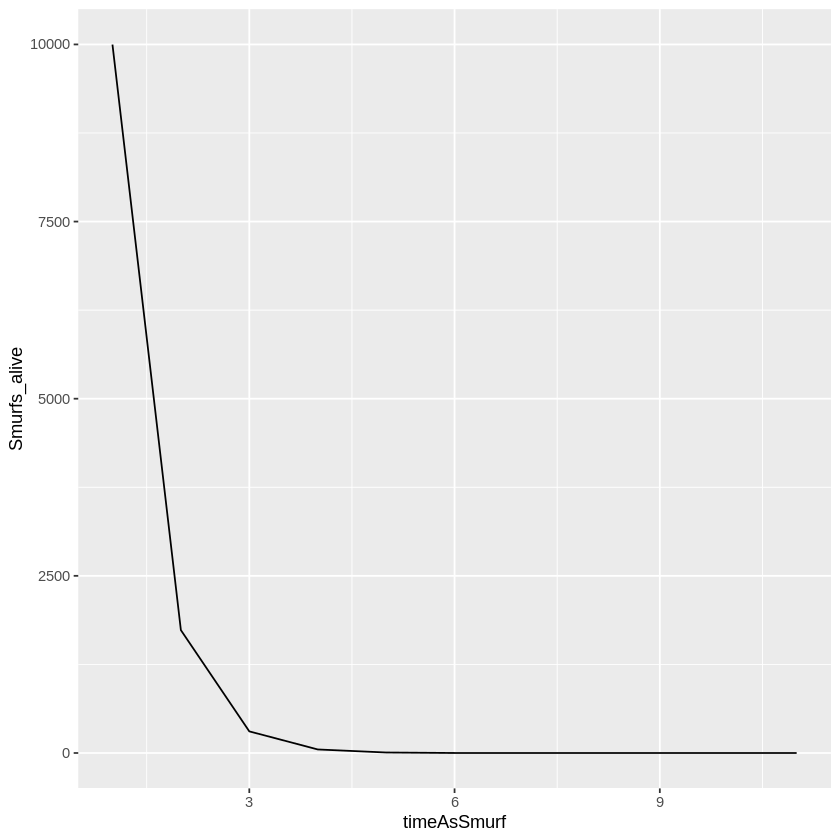

In [11]:
#Smurf survival curve
ggplot(Smurf_surv, aes(timeAsSmurf, Smurfs_alive))+
    geom_line()

In [13]:
pop<-as.data.frame(t(pop))

In [14]:
age_max<-68

ERROR while rich displaying an object: Error in FUN(X[[i]], ...): object 'S_alive' not found

Traceback:
1. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
2. tryCatchList(expr, classes, parentenv, handlers)
3. tryCatchOne(expr, names, parentenv, handlers[[1L]])
4. doTryCatch(return(expr), name, parentenv, handler)
5. withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler)
6. repr::mime2repr[[mime]](obj)
7. repr_text.default(obj)
8. paste(capture.output(print

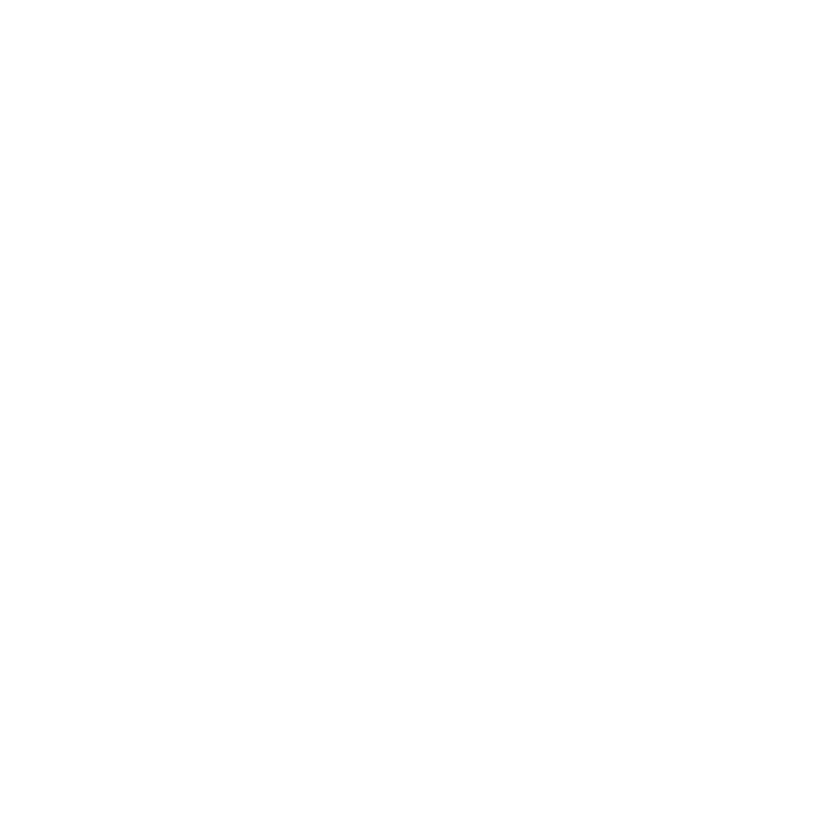

In [15]:
ggplot(pop)+
    geom_line(aes(age,n_NS), linetype="dashed")+
    geom_line(aes(age,n_S), color="blue")+
    geom_line(aes(age,S_alive), color="dark blue", linetype="dashed")+
    geom_line(aes(age,n_NS+S_alive))+
    xlim(0,age_max)

ERROR while rich displaying an object: Error in FUN(X[[i]], ...): object 'S_alive' not found

Traceback:
1. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
2. tryCatchList(expr, classes, parentenv, handlers)
3. tryCatchOne(expr, names, parentenv, handlers[[1L]])
4. doTryCatch(return(expr), name, parentenv, handler)
5. withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler)
6. repr::mime2repr[[mime]](obj)
7. repr_text.default(obj)
8. paste(capture.output(print

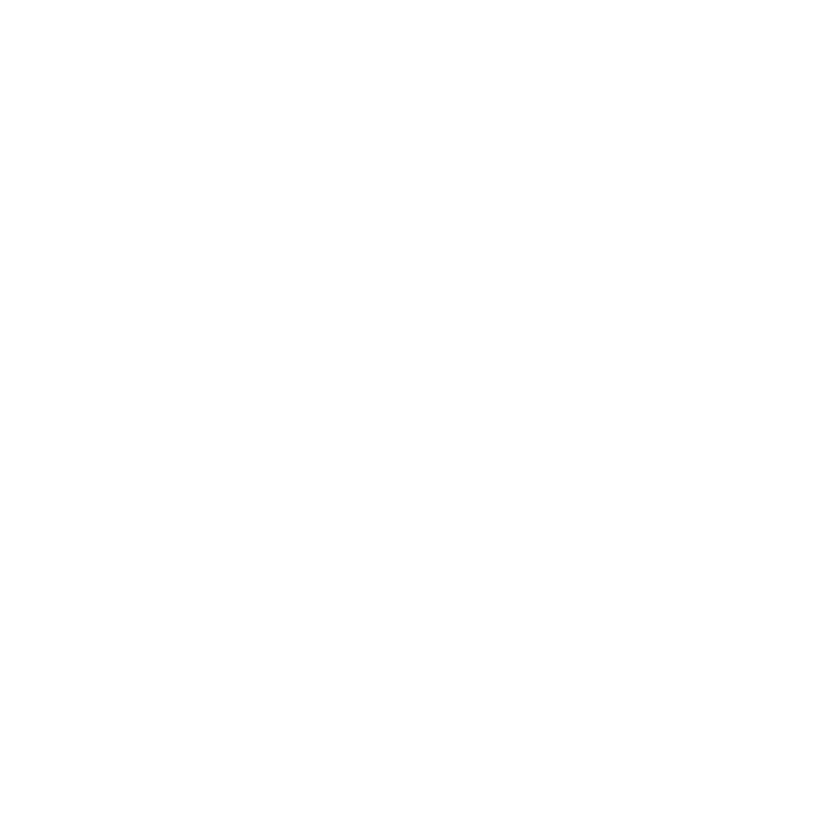

In [16]:
ggplot(pop)+
    geom_point(aes(x=age,y=S_alive/(S_alive+n_NS)), color="blue")+
    geom_smooth(aes(x=age,y=S_alive/(S_alive+n_NS)))+
    ylim(0,1)+
    xlim(0,age_max)  